<a href="https://colab.research.google.com/github/santamus/lab1/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Новый раздел

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Chicago_hotels.csv',sep=";",skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date1   120 non-null    object
 1   date2   120 non-null    int64 
 2   x1      112 non-null    object
 3   x2      112 non-null    object
 4   x3      112 non-null    object
 5   x4      112 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.8+ KB


In [216]:
df

,date1,date2,x1,x2,x3,x4
0,January,1994,"44,3","104,04","51,9","72,15"
1,February,1994,"54,7","102,74","60,1","73,47"
2,March,1994,"61,9","105,23",65,"74,91"
3,April,1994,"69,1","113,63","69,8","79,06"
4,May,1994,"70,8","120,77","72,4","82,07"
...,...,...,...,...,...,...
115,August,2003,NaN,NaN,NaN,NaN
116,September,2003,NaN,NaN,NaN,NaN
117,October,2003,NaN,NaN,NaN,NaN
118,November,2003,NaN,NaN,NaN,NaN


In [217]:
rows_in_df = 120
date_list = []
df['x2']=df['x2'].astype(str)
for i in range(0,120):
    df['x2'][i] = df['x2'][i].replace(',','.');
for i in range(1, rows_in_df + 1):
  date_list.append(i)
df['month'] = date_list
df['x2']=df['x2'].astype(np.float)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date1,date2,x1,x2,x3,x4,month
0,January,1994,"44,3",104.04,"51,9","72,15",1
1,February,1994,"54,7",102.74,"60,1","73,47",2
2,March,1994,"61,9",105.23,65,"74,91",3
3,April,1994,"69,1",113.63,"69,8","79,06",4
4,May,1994,"70,8",120.77,"72,4","82,07",5
...,...,...,...,...,...,...,...
115,August,2003,NaN,NaN,NaN,NaN,116
116,September,2003,NaN,NaN,NaN,NaN,117
117,October,2003,NaN,NaN,NaN,NaN,118
118,November,2003,NaN,NaN,NaN,NaN,119


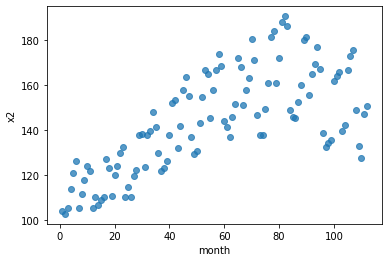

In [218]:
plt.scatter(df['month'],df['x2'], alpha=0.75)

plt.xlabel('month')
plt.ylabel('x2')
plt.show()

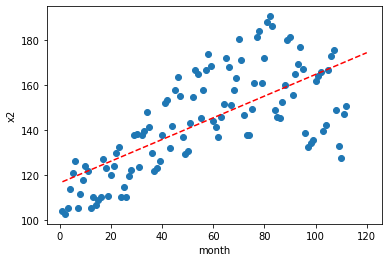

In [225]:
x = df['month'].astype(np.float)
y = df['x2'].astype(np.float)
plt.scatter(x,y)
idx = np.isfinite(x) & np.isfinite(y)
z = np.polyfit(x[idx], y[idx], 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('month')
plt.ylabel('x2')
plt.show()

In [274]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y = df.iloc[:-8,6:7].values
X = df.iloc[:-8,3:4].values

lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

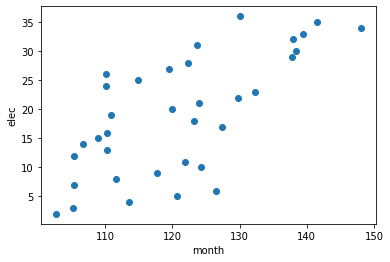

In [275]:
plt.scatter(X[1:36], y[1:36]);

plt.xlabel('month')
plt.ylabel('elec')
plt.show()

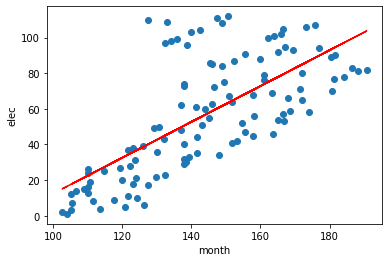

In [276]:
y_lr = lr.predict(X)

plt.scatter(X, y);
plt.plot (X, y_lr, 'r');

plt.xlabel('month')
plt.ylabel('elec')
plt.show()

In [277]:
date_list = []
for i in range(112, 120):
  date_list.append(i)
z = np.concatenate((X, np.array(date_list).reshape(-1,1)), axis=0)

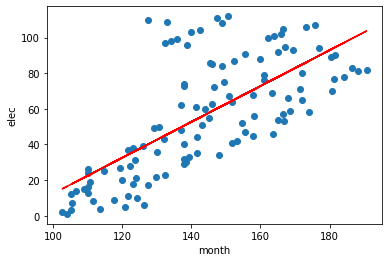

In [278]:
y_lr = lr.predict(z)

plt.scatter(X, y);
plt.plot (z, y_lr, 'r');

plt.xlabel('month')
plt.ylabel('elec')

plt.show()